In [14]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

In [15]:
TRAIN_DIR = '../input/vcor-vehicle-color-recognition-dataset/train'
VAL_DIR = '../input/vcor-vehicle-color-recognition-dataset/val'
TEST_DIR = '../input/vcor-vehicle-color-recognition-dataset/test'

In [16]:
IMG_SIZE=244

In [17]:
traingen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
valgen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
testgen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
# load and iterate training dataset
train_it = traingen.flow_from_directory(TRAIN_DIR, class_mode='categorical', target_size=(IMG_SIZE, IMG_SIZE), batch_size=64)
# load and iterate validation dataset
val_it = valgen.flow_from_directory(VAL_DIR, class_mode='categorical', target_size=(IMG_SIZE, IMG_SIZE),batch_size=64)
# load and iterate test dataset
test_it = testgen.flow_from_directory(TEST_DIR, class_mode='categorical',target_size=(IMG_SIZE, IMG_SIZE), batch_size=64)

Found 7267 images belonging to 15 classes.
Found 1550 images belonging to 15 classes.
Found 1556 images belonging to 15 classes.


In [18]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(244, 244, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(15, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [19]:
model = define_model()
history = model.fit(train_it, steps_per_epoch=len(train_it),validation_data=val_it, validation_steps=len(val_it), epochs=10, verbose=1)

Epoch 1/10
114/114 [==============================] - 49s 429ms/step - loss: 2.4891 - accuracy: 0.1863 - val_loss: 2.2064 - val_accuracy: 0.3606
Epoch 2/10
114/114 [==============================] - 50s 440ms/step - loss: 1.8482 - accuracy: 0.3702 - val_loss: 1.5650 - val_accuracy: 0.5535
Epoch 3/10
114/114 [==============================] - 48s 421ms/step - loss: 1.4516 - accuracy: 0.4990 - val_loss: 1.2440 - val_accuracy: 0.6445
Epoch 4/10
114/114 [==============================] - 51s 449ms/step - loss: 1.2075 - accuracy: 0.5792 - val_loss: 1.1306 - val_accuracy: 0.6658
Epoch 5/10
114/114 [==============================] - 50s 434ms/step - loss: 1.1013 - accuracy: 0.6192 - val_loss: 0.9646 - val_accuracy: 0.6987
Epoch 6/10
114/114 [==============================] - 49s 428ms/step - loss: 1.0066 - accuracy: 0.6503 - val_loss: 0.9796 - val_accuracy: 0.7084
Epoch 7/10
114/114 [==============================] - 50s 438ms/step - loss: 0.9150 - accuracy: 0.6830 - val_loss: 0.8437 - val_ac

In [20]:
loss, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
acc

0.7538560628890991

In [21]:
import matplotlib.pyplot as plt
import sys
# plot diagnostic learning curves
def show_training_curves(history):
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.tight_layout()
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    plt.savefig(filename + '_plot.png')
    plt.show()
    plt.close()

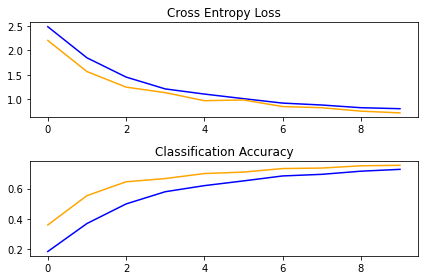

In [22]:
show_training_curves(history)